# 02 - Regional Literature: *Indian Monsoon Onset and Withdrawal*

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import mapping, Point
import datetime
import numpy as np
import rioxarray
from scipy.interpolate import griddata

import xarray as xr

from mpl_toolkits.axes_grid1 import make_axes_locatable

from visualization.custom_plots import standard_format_single, day_of_year_to_date

In [2]:
# Geopackages with boundaries
country_boundary_file   = '../data/raw/external/GADM41_IND.gpkg' 
world_boundary_file     = '../data/raw/external/GADM41_WORLD.gpkg' 

# Geodataframes for boudaries - Level 0 is for country boundaries 
country_boundary    = gpd.read_file(country_boundary_file, layer = 'ADM_ADM_1')
world_boundary      = gpd.read_file(world_boundary_file, layer = 'ADM_0')

In [3]:
gridded_dates_file      = '../data/preprocessed/external/monsoon_dates.nc'
ds_rast = xr.open_dataset(gridded_dates_file)

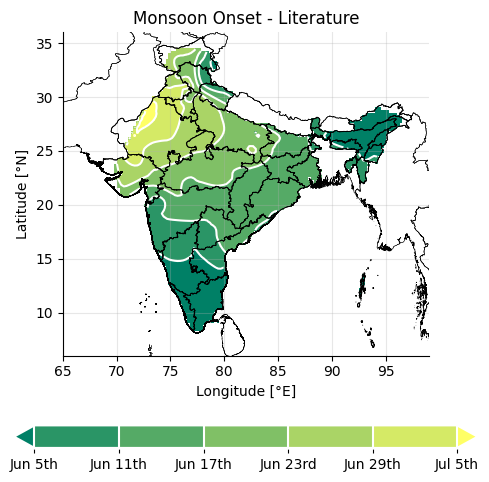

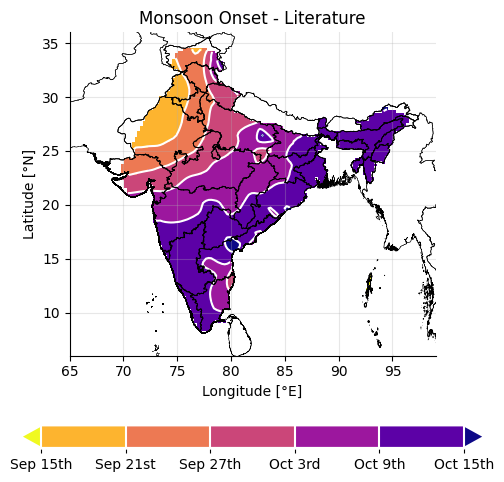

In [5]:
to_plot_onset = ds_rast.sel(season_idx='onset').date
to_plot_wit = ds_rast.sel(season_idx='withdrawal').date

for to_plot, cmap, title in zip([to_plot_onset, to_plot_wit],
                                ['summer', 'plasma_r'],
                                ['Monsoon Onset - Literature','Monsoon Withdrawal - Literature']):
    

    lev = np.linspace(to_plot.min()+15,to_plot.max()-1,6)

    plot_contourf = to_plot.plot(levels = lev, add_colorbar = False, figsize = (6,6), cmap = cmap)
    plot_contour  = to_plot.plot.contour(levels = lev, colors = 'white', linewidths = 1.5)

    standard_format_single( plot_contourf,
                            country_boundary   = country_boundary,
                            world_boundary     = world_boundary,
                            custom_cbar        = True
                            )

    plot_contourf.colorbar.set_ticks(ticks=lev, labels=[day_of_year_to_date(x) for x in lev])

    plt.title('Monsoon Onset - Literature')